## 1. Cartpole

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(2048, 1000, 2) (2048, 1000, 2) (2048, 999, 1)


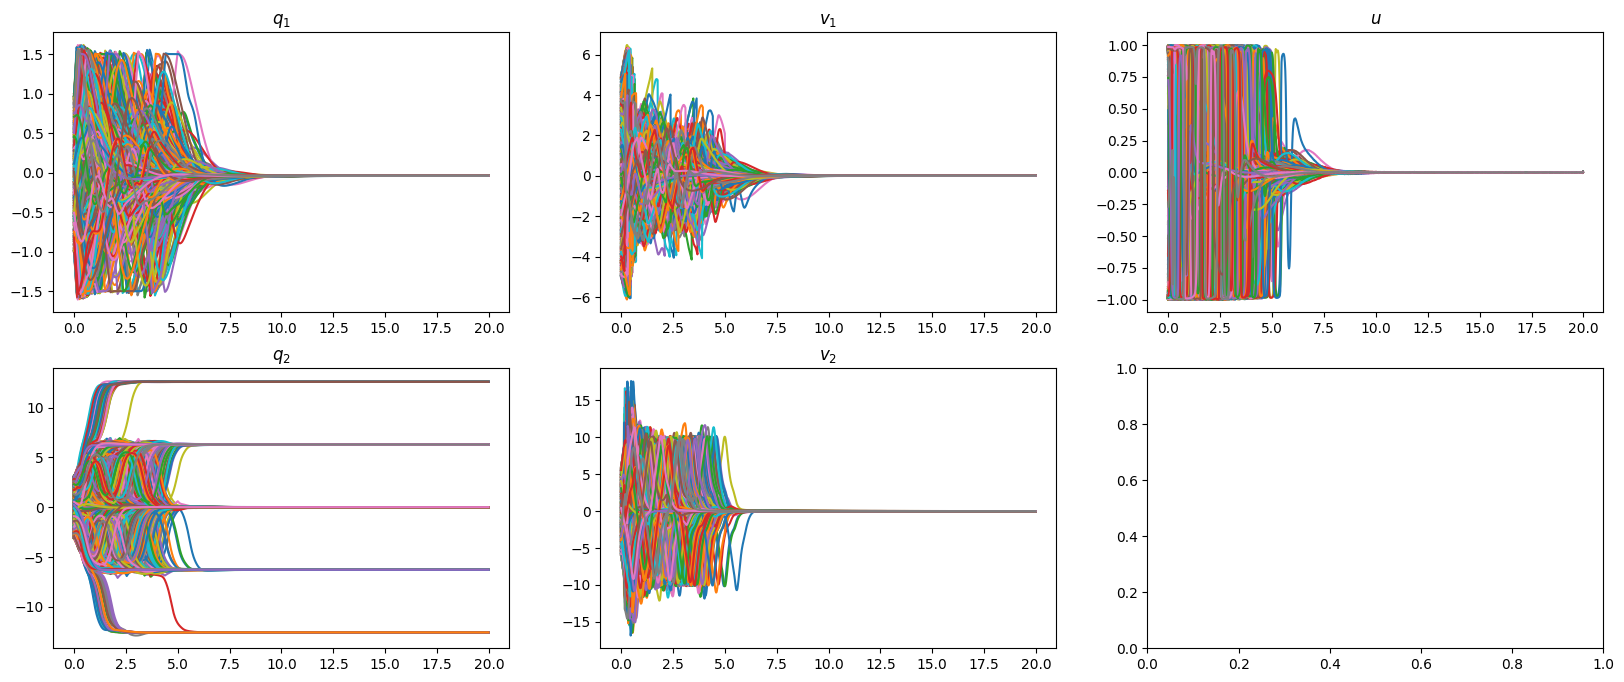

In [3]:
%load_ext autoreload
%autoreload 2
import sys, os, os.path as osp
sys.path.append(osp.dirname(osp.abspath("")))

import matplotlib.pyplot as plt

from flax.struct import dataclass as flax_dataclass
from utils import *


@flax_dataclass
class CfgRawData:
    nq: int = 2
    nv: int = 2
    nu: int = 1
    sim_dt: float|None = None
    
@flax_dataclass
class CfgRawDataAcrobot(CfgRawData):
    sim_dt: float = 0.01
    
@flax_dataclass
class CfgRawDataCartPole(CfgRawData):
    sim_dt: float = 0.02
    

# rom_type = "acrobot"
# cfg_raw_data = CfgRawDataAcrobot()

rom_type = "cart_pole"
cfg_raw_data = CfgRawDataCartPole()

data_path = osp.join(get_repo_root(), f"data/{rom_type}_data.npz")
data_array = np.load(data_path)

qs, vs, us = data_array["q_traj"], data_array["v_traj"], data_array["u_traj"]
num_traj, num_steps, _ = qs.shape
print(qs.shape, vs.shape, us.shape)

ts = np.arange(num_steps) * cfg_raw_data.sim_dt

fig, axes = plt.subplots(2,3, figsize=(20,8))
axes[0,0].set_title(r"$q_1$")
axes[1,0].set_title(r"$q_2$")
axes[0,1].set_title(r"$v_1$")
axes[1,1].set_title(r"$v_2$")
axes[0,2].set_title(r"$u$")

for i in range(num_traj):
    axes[0,0].plot(ts, qs[i,:,0])
    axes[1,0].plot(ts, qs[i,:,1])
    axes[0,1].plot(ts, vs[i,:,0])
    axes[1,1].plot(ts, vs[i,:,1])
    axes[0,2].plot(ts[:-1], us[i,:])

In [ ]:

%load_ext autoreload
%autoreload 2
import sys, os.path as osp
sys.path.append(osp.dirname(osp.abspath("")))
from torch.utils.data import random_split

import jax, jax.numpy as jnp, numpy as np
import matplotlib.pyplot as plt

from utils import get_repo_root
from data_gen import *
from rom import *


cfg_train = CfgTrain()
dataset = CartPoleDataset(pred_horizon=cfg_train.max_train_pred_horizon,
                          data_path=osp.join(get_repo_root(), "data/cart_pole_data.npz"))
train_set, eval_set = random_split(dataset, [cfg_train.train_portion, 1-cfg_train.train_portion])
train_set.collate_fn = CartPoleDataset.collate_fn
eval_set.collate_fn = CartPoleDataset.collate_fn

dataloader = jdl.DataLoader(dataset, batch_size=cfg_train.batch_size, 
                            backend='pytorch', shuffle=True)

rom = NNROM(CfgNNCartPoleROM())

batch = next(iter(dataloader))
x, xs_next, us= batch['from'], batch['to'], batch['ctrl']

print(f"x type: {type(x)}")
print(f"x.shape, xs_next.shape, us.shape: {x.shape}, {xs_next.shape}, {us.shape}")
print(f"x.device, xs_next.device, us.device: {x.device}, {xs_next.device}, {us.device}")

loss_recon = rom.loss_recon(batch)
loss_reproj = rom.loss_reproj(batch)
loss_fwd = rom.loss_fwd(batch)
loss_bwd = rom.loss_bwd(batch)
loss_recon, loss_reproj, loss_fwd, loss_bwd


Failed to import warp: No module named 'warp'
Failed to import mujoco.mjx.third_party.mujoco_warp as mujoco_warp: No module named 'warp'
4 1 5
x type: <class 'numpy.ndarray'>
x.shape, xs_next.shape, us.shape: (4096, 4), (4096, 4, 4), (4096, 4, 1)
x.device, xs_next.device, us.device: cpu, cpu, cpu


(Array(3.7858534, dtype=float32),
 Array(0.6121849, dtype=float32),
 Array(0.79732454, dtype=float32),
 Array(3.7987661, dtype=float32))

Failed to import warp: No module named 'warp'
Failed to import mujoco.mjx.third_party.mujoco_warp as mujoco_warp: No module named 'warp'


[14:19:27] INFO     DoubinteDataset initialized with 2023424 windows/items                          ]8;id=942024;file:///home/kyle/repos/latent_loco/data_gen.py\data_gen.py]8;;\:]8;id=610054;file:///home/kyle/repos/latent_loco/data_gen.py#154\154]8;;\

           INFO              pred_horizon: 10, max_tstep: 999                                       ]8;id=109562;file:///home/kyle/repos/latent_loco/data_gen.py\data_gen.py]8;;\:]8;id=37645;file:///home/kyle/repos/latent_loco/data_gen.py#155\155]8;;\

           INFO              xs_raw_shape: (2048, 1000, 4), us_raw_shape: (2048, 999, 1)            ]8;id=393345;file:///home/kyle/repos/latent_loco/data_gen.py\data_gen.py]8;;\:]8;id=669353;file:///home/kyle/repos/latent_loco/data_gen.py#156\156]8;;\

<function BaseDataset.collate_fn at 0x75c93aa71240>


  0%|          | 0/100 [00:00<?, ?it/s]/home/kyle/miniforge3/envs/latent_loco/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Loss: 3.05e-01, LR: 0.00e+00: 100%|██████████| 100/100 [06:14<00:00,  3.74s/it, pred_horizon=9, b_loss=2.97e-01, b_prog=444/445, in_ae_warmup=0]


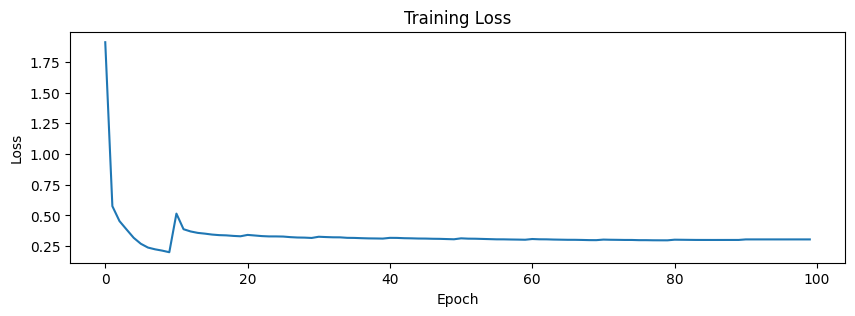

/home/kyle/miniforge3/envs/latent_loco/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[14:25:44] INFO     NNX module saved to /home/kyle/repos/latent_loco/logs/cart_pole                    ]8;id=821993;file:///home/kyle/repos/latent_loco/utils.py\utils.py]8;;\:]8;id=568487;file:///home/kyle/repos/latent_loco/utils.py#210\210]8;;\

x.shape: (256, 4), xs_next.shape: (256, 10, 4), us.shape: (256, 10, 1)


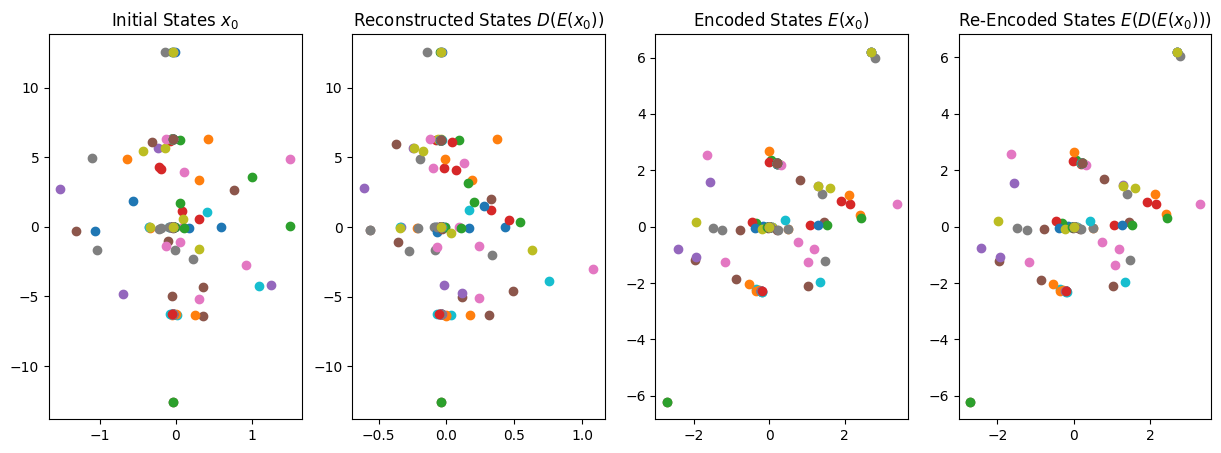

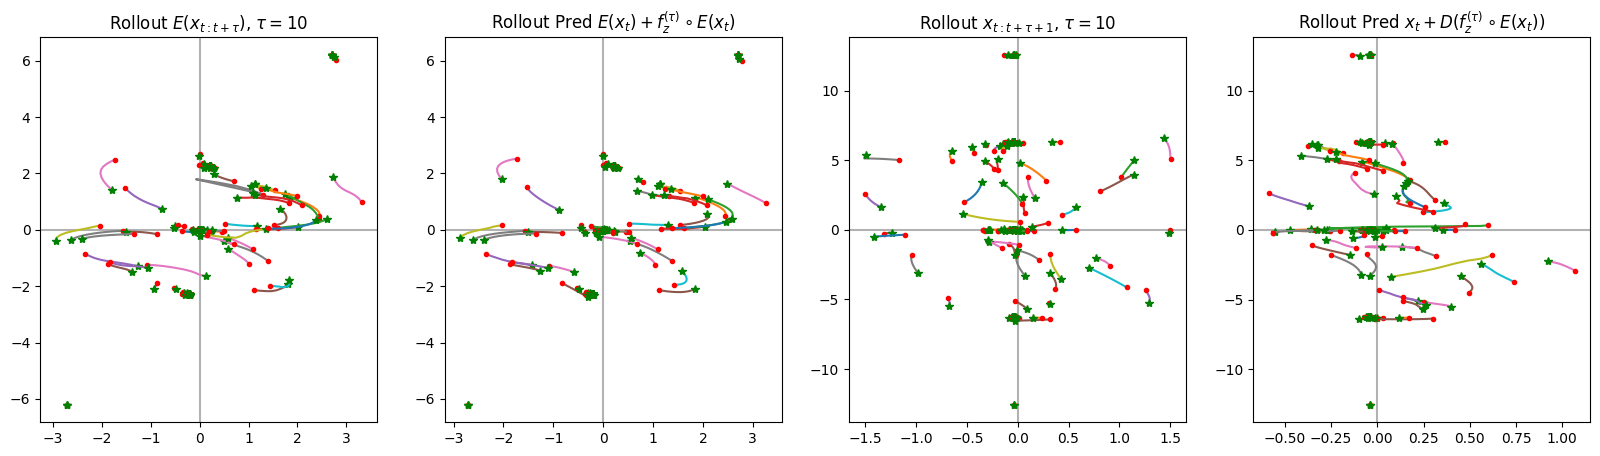

In [1]:
%load_ext autoreload
%autoreload 2
import sys, os.path as osp
sys.path.append(osp.dirname(osp.abspath("")))

import jax, jax.numpy as jnp, numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import random_split

from utils import get_repo_root, save_nnx_module, restore_nnx_module
from data_gen import *
from rom import *

cfg_rom = CfgNNCartPoleROM(encoder_specs=(128,128,128,), 
                           decoder_specs=(128,128,128,),
                           nz=2, # dim 4 worked
                           fz_specs=(128,128,128))
cfg_train = CfgTrain(num_epochs=100, batch_size=4096, lr=1e-4,
                     ae_warmup_portion=0.1,
                     max_train_pred_horizon=10,
                     max_eval_pred_horizon=10)
cfg_loss = CfgLoss(recon=1.0, reproj=0.0, fwd=1.0, bwd=1.0)
rng_seed = 0

dataset = CartPoleDataset(pred_horizon=cfg_train.max_train_pred_horizon, 
                          data_path=osp.join(get_repo_root(), f"data/cart_pole_data.npz"))
train_set, eval_set = random_split(dataset, [cfg_train.train_portion, 1-cfg_train.train_portion])
train_set.collate_fn = CartPoleDataset.collate_fn
eval_set.collate_fn = CartPoleDataset.collate_fn
print(eval_set.collate_fn)

rom = NNROM(cfg_rom, rngs=nnx.Rngs(rng_seed))

if train_from_scratch:=True:
    _ = train(rom, train_set, cfg_train, cfg_loss)
    save_nnx_module(rom, f"{get_repo_root()}/logs/cart_pole")

else:
    rom = restore_nnx_module(lambda: NNROM(cfg_rom, rngs=nnx.Rngs(rng_seed)),
                             f"{get_repo_root()}/logs/cart_pole")

evaluate(rom, eval_set, cfg_train, cfg_loss)

x.shape: (256, 4), xs_next.shape: (256, 10, 4), us.shape: (256, 10, 1)


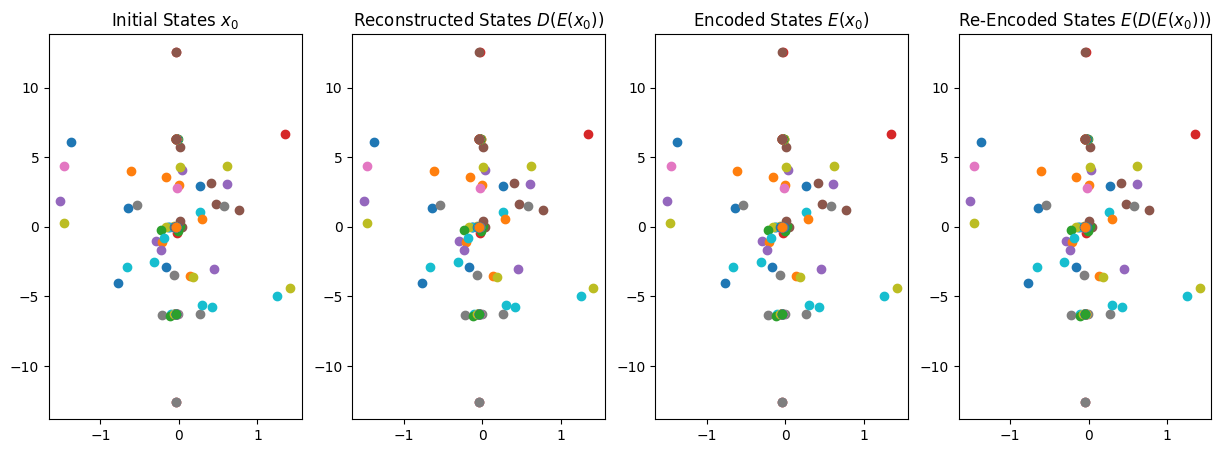

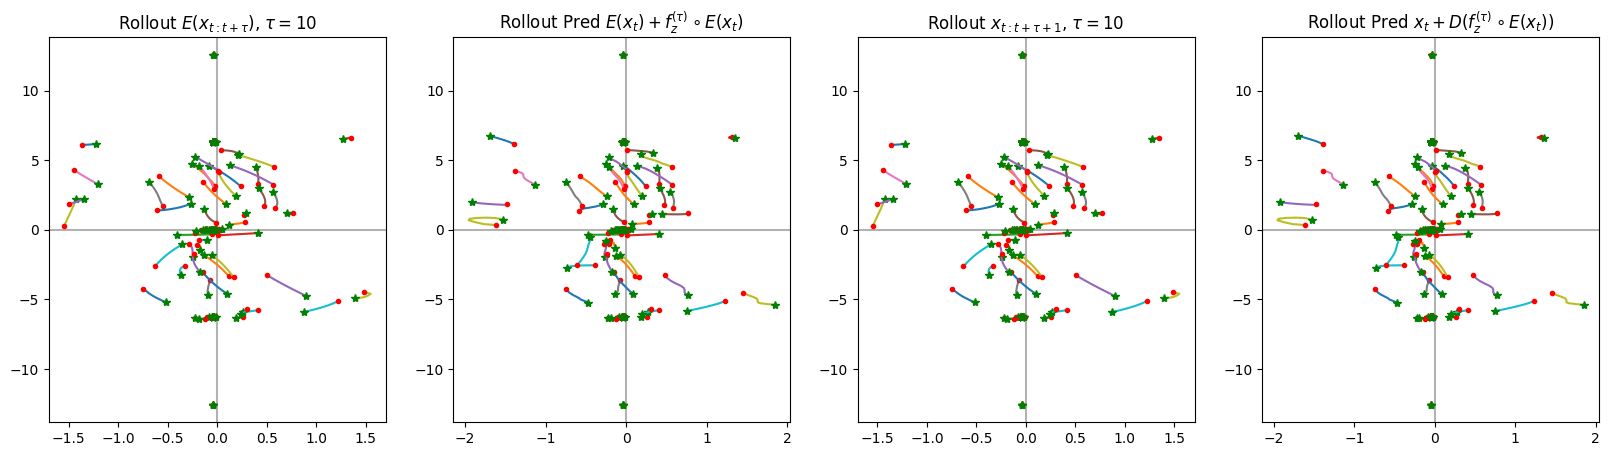

In [5]:
evaluate(rom, eval_set, cfg_train, cfg_loss)